Text(0.5, 1.0, 'thr')

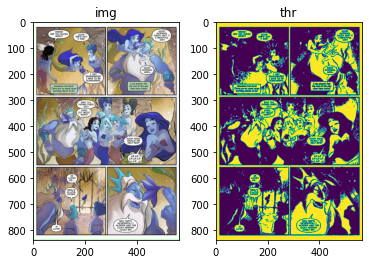

In [18]:
import os
import math
import cv2
import matplotlib.pyplot as plt

def setLabel(img, pts, label):
    (x,y,w,h) = cv2.boundingRect(pts)
    pt1 = (x,y)
    pt2 = (x+w, y+h)
    cv2.rectangle(img, pt1, pt2, (0,255,0), 2)
    cv2.putText(img, label, (pt1[0], pt1[1]-3), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))


path ="cartoon1.jpg"

## 사각형 추출하기

# 이미지 불러온 후 그레이 스케일로 변환 후 이진화
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thr = cv2.threshold(gray, 0,255, cv2.THRESH_OTSU)


# 외곽선 검출
contours, _ = cv2.findContours(thr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # 계층 정보는 필요x여서 생략

# 검출된 외곽선 반복하면서 꼭지점을 구함
for cont in contours:
    apropox = cv2.approxPolyDP(cont, cv2.arcLength(cont, True)*0.02, True)
    vtc = len(apropox)
    if vtc==4:
        setLabel(img, cont, 'Rec')
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('img')
plt.subplot(1,2,2)
plt.imshow(thr)
plt.title('thr')

# cv2.imshow('img', img)
# cv2.imshow('binary', thr)

# cv2.waitkey()
# cv2.destroyAllWindows()

In [21]:
# 컷 찾기

import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract
import os
import csv

In [22]:
# find all speech bubbles in the given comic page and return a list of cropped speech bubbles (with possible false positives)
def findSpeechBubbles(imagePath, method = 'simple'):
    # read image
    image = cv2.imread(imagePath)
    # gray scale
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # filter noise
    imageGrayBlur = cv2.GaussianBlur(imageGray,(3,3),0)
    if method != 'simple':
        # recognizes more complex bubble shapes
        imageGrayBlurCanny = cv2.Canny(imageGrayBlur,50,500)
        binary = cv2.threshold(imageGrayBlurCanny,235,255,cv2.THRESH_BINARY)[1]
    else:
        # recognizes only rectangular bubbles
        binary = cv2.threshold(imageGrayBlur,235,255,cv2.THRESH_BINARY)[1]
    # find contours
    contours = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[0]
    # get the list of cropped speech bubbles
    croppedImageList = []
    for contour in contours:
        rect = cv2.boundingRect(contour)
        [x, y, w, h] = rect
        # filter out speech bubble candidates with unreasonable size
        if w < 500 and w > 60 and h < 500 and h > 25:
            croppedImage = image[y:y+h, x:x+w]
            croppedImageList.append(croppedImage)

    return croppedImageList

In [ ]:
# apply the ocr engine to the given image and return the recognized script where illegitimate characters are filtered out
def tesseract(image):
    script = pytesseract.image_to_string(image, lang = 'eng')
    for char in script:
        if char not in ' -QWERTYUIOPASDFGHJKLZXCVBNMqwertyuiopasdfghjklzxcvbnm,.?!1234567890"":;\'':
            script = script.replace(char,'')
    
    return script

In [20]:
## 테서랙트

from PIL import Image
from pytesseract import pytesseract

# Defining paths to tesseract.exe
# and the image we would be using
path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
image_path = r"imgs/liv.jpg"

# Opening the image & storing it in an image object
img = Image.open(image_path)

# Providing the tesseract executable
# location to pytesseract library
pytesseract.tesseract_cmd = path_to_tesseract

# Passing the image object to image_to_string() function
# This function will extract the text from the image
text = pytesseract.image_to_string(img)

# Displaying the extracted text
print(text[:-1]) # 맨 뒤에 애ㅔㄴ터는 뺀 듯


THOMAS RUMBOLD.

Rumbold was the son of honest and industrious parents, who lived at
Ipswich, in Suffolk. In his youth he was apprenticed to a bricklayer; but evil
inclinations gaining an ascendancy over his mind, he quitted his employment
before a third part of his time was expired. In order to support himself after
having absconded, and conceiving a great desire to see London, he repaired
thither, and soon confederated himself with a gang of robbers. In conjunction
with these he shared in many daring exploits; but wishing to try his skill and
fortune alone, he left them, and repaired to the road.
